## Bank Marketing Data EDA
The notebook is structured as follows:
1. import the data
2. EDA on numeric variables
3. EDA on categorical variables
4. Explore the relationship between independent variables and the dependent variable
5. Explore the relationship between the independent variables

In [1]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import os
from functions import functions
plot_path = r'C:\Users\Tina\Desktop\rocket_case_study\plots'

ModuleNotFoundError: No module named 'functions'

In [2]:
functions

NameError: name 'functions' is not defined

In [2]:
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
df = X.join(y)
print(X.shape, y.shape, df.shape)

# # metadata 
# print(bank_marketing.metadata) 
  
# # variable information 
# print(bank_marketing.variables) 

(45211, 16) (45211, 1) (45211, 17)


In [3]:
display(bank_marketing.variables) 

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,None,no
1,job,Feature,Categorical,Occupation,"type of job (categorical: 'admin.','blue-colla...",None,no
2,marital,Feature,Categorical,Marital Status,"marital status (categorical: 'divorced','marri...",None,no
3,education,Feature,Categorical,Education Level,"(categorical: 'basic.4y','basic.6y','basic.9y'...",None,no
4,default,Feature,Binary,None,has credit in default?,None,no
5,balance,Feature,Integer,None,average yearly balance,euros,no
6,housing,Feature,Binary,None,has housing loan?,None,no
7,loan,Feature,Binary,None,has personal loan?,None,no
8,contact,Feature,Categorical,None,contact communication type (categorical: 'cell...,None,yes
9,day_of_week,Feature,Date,None,last contact day of the week,None,no


In [4]:
df_dict = bank_marketing.variables
df_dict['type_binary'] = np.where(df_dict['type']=='Integer', 'N', 'C')

In [7]:
cat_var = df_dict[df_dict["type_binary"]=="C"]["name"].to_list()
num_var = df_dict[df_dict["type_binary"]=="N"]["name"].to_list()

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [9]:
df.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

In [14]:
encoded_df = df[cat_var].apply(LabelEncoder().fit_transform)
encoded_df = df[num_var].join(encoded_df)

In [15]:
encoded_df.head()

,age,balance,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,day_of_week,month,poutcome,y
0,58,2143,261,1,-1,0,4,1,2,0,1,0,2,4,8,3,0
1,44,29,151,1,-1,0,9,2,1,0,1,0,2,4,8,3,0
2,33,2,76,1,-1,0,2,1,1,0,1,1,2,4,8,3,0
3,47,1506,92,1,-1,0,1,1,3,0,1,0,2,4,8,3,0
4,33,1,198,1,-1,0,11,2,3,0,0,0,2,4,8,3,0


## Numeric variable EDA

In [16]:
df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


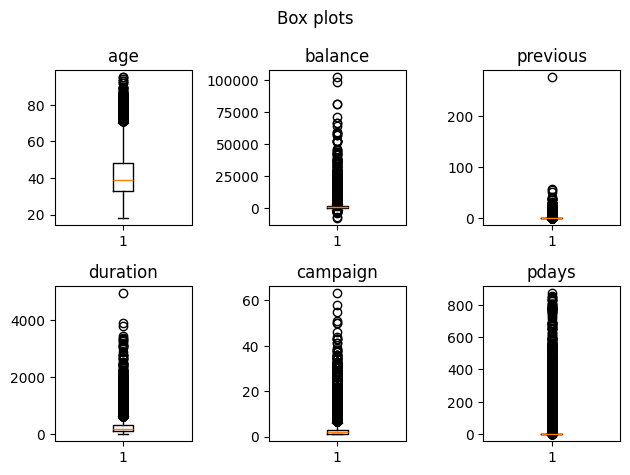

In [17]:
fig, axs = plt.subplots(2, 3)

# basic plot
axs[0, 0].boxplot(df.age)
axs[0, 0].set_title('age')

# notched plot
axs[0, 1].boxplot(df.balance)
axs[0, 1].set_title('balance')

# change outlier point symbols
axs[0, 2].boxplot(df.previous)
axs[0, 2].set_title('previous')

# don't show outlier points
axs[1, 0].boxplot(df.duration)
axs[1, 0].set_title("duration")

# horizontal boxes
axs[1, 1].boxplot(df.campaign)
axs[1, 1].set_title('campaign')

# change whisker length
axs[1, 2].boxplot(df.pdays)
axs[1, 2].set_title('pdays')
fig.subplots_adjust(left=.01, right=1, bottom=0.05, top=0.9,
                    hspace=0.5, wspace=0.5)
plt.suptitle("Box plots")
plt.tight_layout()
plt.savefig(os.path.join(plot_path, 'box_plots.png'))
plt.show()

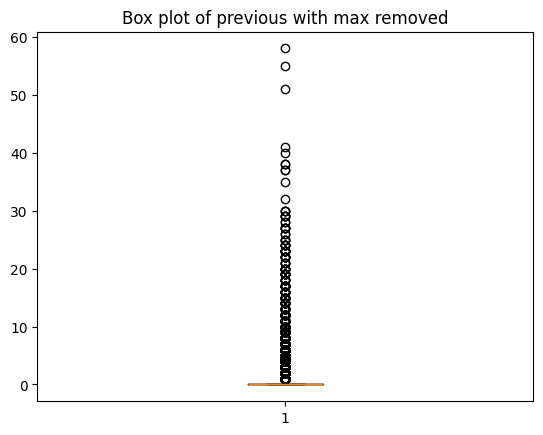

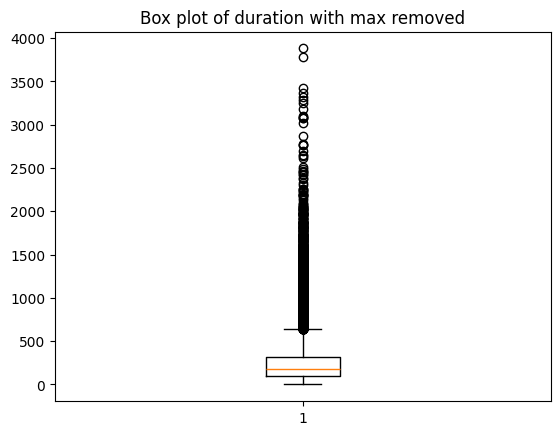

In [18]:
for feature in ['previous', 'duration']:    
    fig1, ax1 = plt.subplots()
    ax1.set_title(f'Box plot of {feature} with max removed')
    ax1.boxplot(df[df[feature]<df[feature].max()][feature])
    plt.show()

In [ ]:
# remove the row with the outlier data point in the "previous" and "duration"
df = df[df.previous<df.previous.max()].copy()
df = df[df.previous<df.previous.max()].copy()
encoded_df = encoded_df[encoded_df.previous<encoded_df.previous.max()].copy()
encoded_df = encoded_df[encoded_df.previous<encoded_df.previous.max()].copy()

## Categorical variables

In [21]:
for column in df.columns:
    if df[column].dtype == 'O':
        display(df[column].value_counts(dropna=False, normalize = True))

job
blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
NaN              0.006370
Name: proportion, dtype: float64

marital
married     0.601933
single      0.282896
divorced    0.115171
Name: proportion, dtype: float64

education
secondary    0.513194
tertiary     0.294198
primary      0.151534
NaN          0.041074
Name: proportion, dtype: float64

default
no     0.981973
yes    0.018027
Name: proportion, dtype: float64

housing
yes    0.555838
no     0.444162
Name: proportion, dtype: float64

loan
no     0.839774
yes    0.160226
Name: proportion, dtype: float64

contact
cellular     0.647741
NaN          0.287983
telephone    0.064276
Name: proportion, dtype: float64

month
may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar    0.010551
dec    0.004733
Name: proportion, dtype: float64

poutcome
NaN        0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: proportion, dtype: float64

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

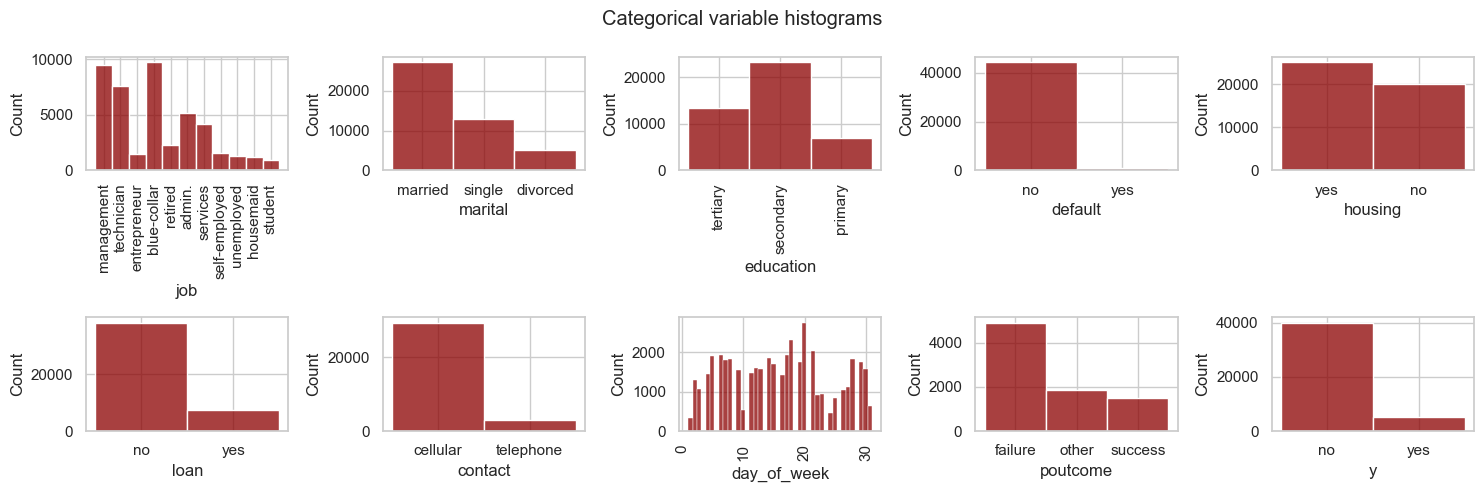

In [23]:
sns.set(style="whitegrid")  
fig,axs = plt.subplots(2,5, figsize = (15, 5))
sns.histplot(data=df, x='job', kde=False, color="darkred", ax=axs[0, 0]).tick_params(axis='x', rotation=90)
sns.histplot(data=df, x='marital', kde=False, color="darkred", ax=axs[0, 1])
sns.histplot(data=df, x='education', kde=False, color="darkred", ax=axs[0, 2]).tick_params(axis='x', rotation=90)
sns.histplot(data=df, x='default', kde=False, color="darkred", ax=axs[0, 3])
sns.histplot(data=df, x='housing', kde=False, color="darkred", ax=axs[0, 4])
sns.histplot(data=df, x='loan', kde=False, color="darkred", ax=axs[1, 0])
sns.histplot(data=df, x='contact', kde=False, color="darkred", ax=axs[1, 1])
sns.histplot(data=df, x='day_of_week', kde=False, color="darkred", ax=axs[1, 2]).tick_params(axis='x', rotation=90)
sns.histplot(data=df, x='poutcome', kde=False, color="darkred", ax=axs[1, 3])
sns.histplot(data=df, x='y', kde=False, color="darkred", ax=axs[1, 4])
plt.suptitle("Categorical variable histograms")
fig.tight_layout()

## Variable relationships

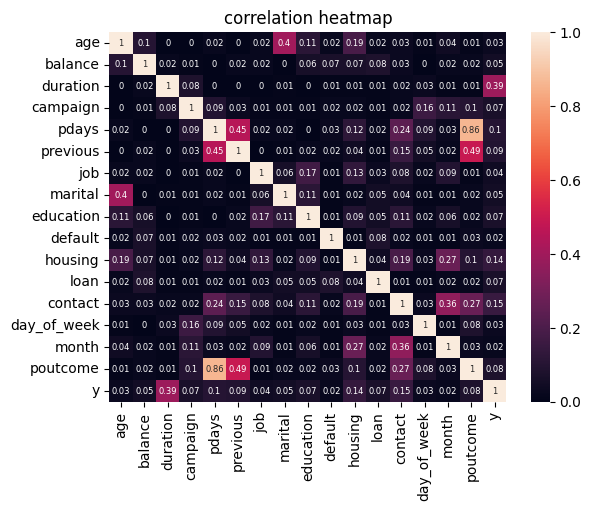

In [20]:
corr_df = encoded_df.corr()
sns.heatmap(abs(corr_df).round(2), vmin=0, vmax=1, annot=True, annot_kws={'fontsize':6})
plt.title("correlation heatmap")
plt.show()

In [ ]:
sns.scatterplot(data= df, x = 'pdays', y= 'previous')
plt.title("previous vs pdays")

In [50]:
df['y'] = np.where(df['y'] == "yes", 1, 0)

In [104]:
iv, woe = iv_woe(df, 'y', bins=10, show_woe=False)

age
Information value of age is 0.116017
Information value of job is 0.155697
Information value of marital is 0.040127
Information value of education is 0.050112
Information value of default is 0.006256
balance
Information value of balance is 0.101939
Information value of housing is 0.188681
Information value of loan is 0.054859
Information value of contact is 0.300396
day_of_week
Information value of day_of_week is 0.056989
Information value of month is 0.436131
duration
Information value of duration is 1.610558
campaign
Information value of campaign is 0.067606
pdays
Information value of pdays is 0.011978
previous
Information value of previous is 0.107818
Information value of poutcome is 0.514609


In [102]:
df.duration.value_counts()

duration
124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: count, Length: 1573, dtype: int64